## Image Recognition using KNN

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
x = mnist["data"]

In [ ]:
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y = mnist["target"]

In [ ]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
examp = x.iloc[2]
examp

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 2, Length: 784, dtype: float64

In [ ]:
examp_image= np.reshape(np.ravel(examp), (28, 28))

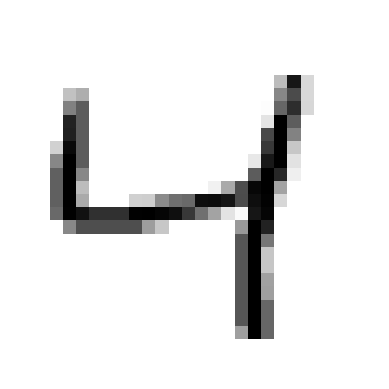

In [ ]:
plt.imshow(examp_image,cmap="binary")
plt.axis("off")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(x_test)
y_pred

array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9705

In [ ]:
examp2 = x_test.iloc[100]
examp2

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 60100, Length: 784, dtype: float64

In [ ]:
examp2_image= np.reshape(np.ravel(examp2), (28, 28))

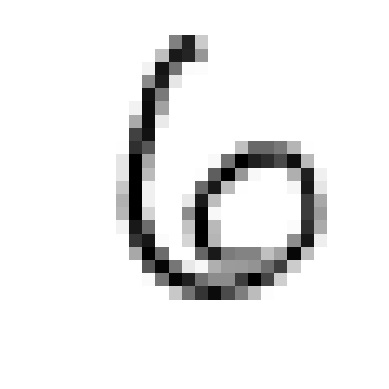

In [ ]:
plt.imshow(examp2_image,cmap="binary")
plt.axis("off")
plt.show()

In [ ]:
y_pred[100]

'6'

## Image Enhancement using KNN

In [ ]:
import numpy.random as nr

In [ ]:
noise = nr.randint(0, 100, (len(x_train), 784))
x_train_n = x_train + noise

In [ ]:
noise = nr.randint(0, 100, (len(x_test), 784))
x_test_n = x_test + noise

In [ ]:
examp3 = x_train_n.iloc[2]
examp3

pixel1      59.0
pixel2      18.0
pixel3      26.0
pixel4      51.0
pixel5      83.0
            ... 
pixel780    26.0
pixel781    40.0
pixel782    97.0
pixel783    87.0
pixel784    63.0
Name: 2, Length: 784, dtype: float64

In [ ]:
examp3_image= np.reshape(np.ravel(examp3), (28, 28))

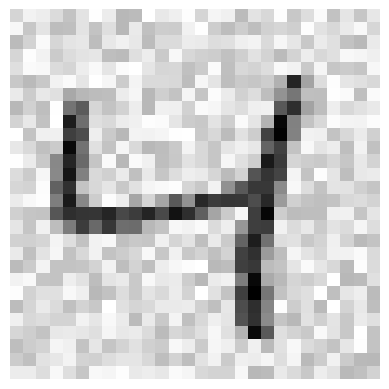

In [ ]:
plt.imshow(examp3_image,cmap="binary")
plt.axis("off")
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(x_train_n, x_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(x_test_n)
y_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

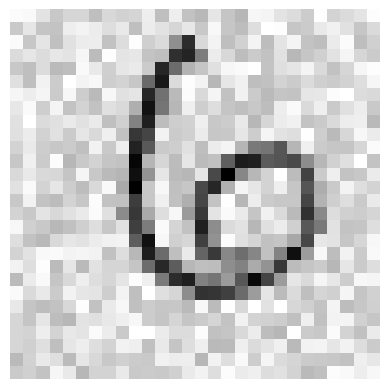

In [ ]:
examp4 = x_test_n.iloc[100]
examp4

examp4_image= np.reshape(np.ravel(examp4), (28, 28))

plt.imshow(examp4_image,cmap="binary")
plt.axis("off")
plt.show()

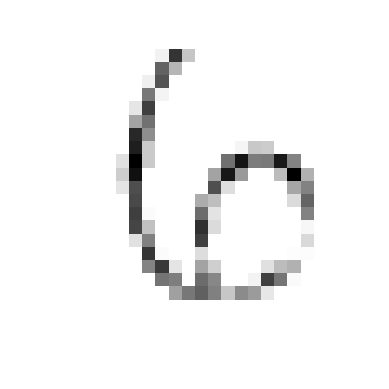

In [ ]:
y_pred[100]

y_pred_image = np.reshape(np.ravel(y_pred[100]), (28, 28))

plt.imshow(y_pred_image,cmap="binary")
plt.axis("off")
plt.show()

## Recommendation Engine

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BI BA Handbook/Chapter 8/Video_Games.csv', header=None)

Video Game dataset from https://cseweb.ucsd.edu/~jmcauley/datasets.html

Ni, J., J. Li, and J. McAuley (2019). Justifying recommendations using distantly-labeled reviews
and fined-grained aspects. Empirical Methods in Natural Language Processing (EMNLP).


In [ ]:
df.head()

,0,1,2,3
0,0439381673,A21ROB4YDOZA5P,1.0,1402272000
1,0439381673,A3TNZ2Q5E7HTHD,3.0,1399680000
2,0439381673,A1OKRM3QFEATQO,4.0,1391731200
3,0439381673,A2XO1JFCNEYV3T,1.0,1391731200
4,0439381673,A19WLPIRHD15TH,4.0,1389830400


In [ ]:
df.columns = ['item', 'user', "rating", "timestamp"]
df.head()

,item,user,rating,timestamp
0,0439381673,A21ROB4YDOZA5P,1.0,1402272000
1,0439381673,A3TNZ2Q5E7HTHD,3.0,1399680000
2,0439381673,A1OKRM3QFEATQO,4.0,1391731200
3,0439381673,A2XO1JFCNEYV3T,1.0,1391731200
4,0439381673,A19WLPIRHD15TH,4.0,1389830400


In [ ]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [ ]:
def sparse_matrix(data):

	U = len(data['user'].unique())
	M = len(data['item'].unique())

	user_map = dict(zip(np.unique(data["user"]), list(range(U))))
	item_map = dict(zip(np.unique(data["item"]), list(range(M))))

	user_inv_map = dict(zip(list(range(U)), np.unique(data["user"])))
	item_inv_map = dict(zip(list(range(M)), np.unique(data["item"])))

	user_index = [user_map[i] for i in data['user']]
	item_index = [item_map[i] for i in data['item']]

	X = csr_matrix((data["rating"], (item_index, user_index)), shape=(M, U))

	return X, user_map, item_map, user_inv_map, item_inv_map

In [ ]:
X, user_map, item_map, user_inv_map, item_inv_map = sparse_matrix(df)

In [ ]:
def find_similar_item(item_id, X, k):

	neighbour_ids = []

	item_ind = item_map[item_id]
	item_vec = X[item_ind]
	k+=1
	kNN = NearestNeighbors(n_neighbors=k, algorithm="brute", metric="cosine")
	kNN.fit(X)
	item_vec = item_vec.reshape(1,-1)
	neighbour = kNN.kneighbors(item_vec, return_distance=False)
	for i in range(0,k):
		n = neighbour.item(i)
		neighbour_ids.append(item_inv_map[n])
	neighbour_ids.pop(0)
	return neighbour_ids

In [ ]:
item_id = "B00B1N07QM"

similar_ids = find_similar_item(item_id, X, k=10)

In [ ]:
similar_ids

['B002EENDWC',
 'B00KMLKSDQ',
 'B00JQ19686',
 'B0010XR33I',
 'B00KTN8ABY',
 'B008YRITPO',
 'B001IMBZVW',
 'B00UR5I2Y4',
 'B00ATE05MA',
 'B00KHO05OA']

In [ ]:
def recommend_items_for_user(user_id, X, user_mapper, item_mapper, item_inv_mapper, k=10):
  df1 = df[df['user'] == user_id]

  item_id = df1[df1['rating'] == max(df1['rating'])]['item'].iloc[0]

  similar_ids = find_similar_item(item_id, X, k)

  print(f"Since you watched {item_id}, you might also like: {similar_ids}")

In [ ]:
user_id = "AZSKYGC1E5KOD"
recommend_items_for_user(user_id, X, user_map, item_map, item_inv_map, k=10)

Since you watched B00B1N07QM, you might also like: ['B002EENDWC', 'B00KMLKSDQ', 'B00JQ19686', 'B0010XR33I', 'B00KTN8ABY', 'B008YRITPO', 'B001IMBZVW', 'B00UR5I2Y4', 'B00ATE05MA', 'B00KHO05OA']


In [ ]:
df.loc[df['user'] == "AZSKYGC1E5KOD"]

,item,user,rating,timestamp
1183477,B00B1N07QM,AZSKYGC1E5KOD,4.0,1420934400


In [ ]:
user_id = "A21ROB4YDOZA5P"
recommend_items_for_user(user_id, X, user_map, item_map, item_inv_map, k=10)

Since you watched 0439381673, you might also like: ['B0007WJCGY', 'B00B5BVWC8', 'B0055OYFKC', 'B00A9W2F4I', 'B0008ISLTG', 'B0071ZWY1K', 'B007638DSA', 'B00JFPO5QG', 'B00ZVQZLVG', 'B00006B178']


PRACTICE (with Pet Supplies data)

Pet Supplies dataset from https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/

Ni, J., J. Li, and J. McAuley (2019). Justifying recommendations using distantly-labeled reviews and fined-grained aspects. Empirical Methods in Natural Language Processing (EMNLP).

Format is one review per line in json.

reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B

asin - ID of the product, e.g. 0000013714

overall - rating of the product

In [ ]:
import json

In [ ]:
data = []
for line in open('/content/drive/MyDrive/BI BA Handbook/Chapter 8/Pet_Supplies_5.json', 'r'):
    data.append(json.loads(line))

In [ ]:
pet = pd.json_normalize(data)

In [ ]:
pet.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,style.Material:,style.Item Shape:,style.Scent Name:,style.Length:,style.Size Name:,style.Product Packaging:,style.Item Display Weight:,style.Number of Items:,style.Model Number:,style.Color Name:
0,3.0,2,True,"12 2, 2016",A2KN4FJVI2TZSF,0972585419,M.G.,I purchased this cd for my Pocket Parrot. It h...,It's okay,1480636800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,NaN,True,"10 17, 2016",A3RMA1DD66JDRV,0972585419,Susan P.,"Maybe it's just my Amazon parrot, but she's no...",It might work for a different bird,1476662400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,2,True,"09 9, 2016",AAANYRIEOIT3R,0972585419,Luggie Lugnut,I bought this to help me teach my blue quaker ...,I bought this to help me teach my blue quaker ...,1473379200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,True,"08 31, 2016",A3W44VX0LXAOHU,0972585419,Melissa Partin,Bird showed no interest in it....,Three Stars,1472601600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,True,"08 18, 2016",A16ZDBZGKYDRSU,0972585419,Cheryle Bell,Didn't do a thing for my African Grey! He hate...,He hated it and it was very obnoxious,1471478400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


PRACTICE (with Movie data)

Movie Reviews dataset from https://grouplens.org/datasets/movielens/1m/

F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4, Article 19 (December 2015), 19 pages.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
mov_label = pd.read_csv('/content/drive/MyDrive/BI BA Handbook/Chapter 8/movies.csv')

In [ ]:
mov_label.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
mov_rating = pd.read_csv('/content/drive/MyDrive/BI BA Handbook/Chapter 8/movie_ratings.csv')

In [ ]:
mov_rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
